In [41]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import tf_record
from tensorflow.core.util import event_pb2

def get_data(path):
    print("Path: " + path)
    R1, ACC, IOU, Losses = [], [], [], []
    try:
        for e in tf_record.tf_record_iterator(path):
            event = event_pb2.Event.FromString(e)
            for v in event.summary.value:
                if v.tag == 'R1':
                    R1.append(v.simple_value)
                if v.tag == 'acc':
                    ACC.append(v.simple_value)
                if v.tag == 'iou':
                    IOU.append(v.simple_value)
                if v.tag == 'loss':
                    Losses.append(v.simple_value)
    except:
        print("Failed to open path {:s}".format(path))
        pass
    print(len(ACC), len(R1), len(IOU), len(Losses))
    if len(ACC) == 0:
        ACC = None
    if len(R1) == 0:
        R1 = None
    if len(IOU) == 0:
        IOU = None
    return ACC, R1, IOU, Losses

def smooth(data, w):
    res = []
    pivot = data[0]
    for dat in data:
        res.append(pivot * w + dat * (1-w))
        pivot = pivot * w + dat * (1-w)
    return res

paths = ['./result/random/classification/events.out.tfevents.1600998752.ubuntu1',
              './result/random/distance/events.out.tfevents.1600999548.ubuntu1',
              './result/random/recognition/events.out.tfevents.1600952222.ubuntu1',
              './result/autoencoder/classification/events.out.tfevents.1601104053.ubuntu1',
              './result/autoencoder/distance/events.out.tfevents.1601104069.ubuntu1',
              './result/autoencoder/recognition/events.out.tfevents.1601104079.ubuntu1',
              './result/proposed/classification/events.out.tfevents.1601213151.ubuntu1',
              './result/proposed/distance/events.out.tfevents.1601213268.ubuntu1',
              './result/proposed/recognition/events.out.tfevents.1601213279.ubuntu1',
              './result/supervised/classification/events.out.tfevents.1601011242.ubuntu1',
              './result/supervised/distance/events.out.tfevents.1601011262.ubuntu1',
              './result/supervised/recognition/events.out.tfevents.1601011283.ubuntu1']

data_r1, data_acc, data_iou, data_loss = [], [], [], []

for path in paths:
    acc, r1, iou, loss = get_data(path)
    if acc is not None:
        data_acc.append(acc)
    if r1 is not None:
        data_r1.append(r1)
    if iou is not None:
        data_iou.append(iou)
    data_loss.append(loss)

Path: ./result/random/classification/events.out.tfevents.1600998752.ubuntu1
50 0 0 50
Path: ./result/random/distance/events.out.tfevents.1600999548.ubuntu1
0 50 0 50
Path: ./result/random/recognition/events.out.tfevents.1600952222.ubuntu1
0 0 50 50
Path: ./result/autoencoder/classification/events.out.tfevents.1601104053.ubuntu1
50 0 0 50
Path: ./result/autoencoder/distance/events.out.tfevents.1601104069.ubuntu1
0 50 0 50
Path: ./result/autoencoder/recognition/events.out.tfevents.1601104079.ubuntu1
0 0 50 50
Path: ./result/proposed/classification/events.out.tfevents.1601213151.ubuntu1
50 0 0 50
Path: ./result/proposed/distance/events.out.tfevents.1601213268.ubuntu1
0 50 0 50
Path: ./result/proposed/recognition/events.out.tfevents.1601213279.ubuntu1
0 0 50 50
Path: ./result/supervised/classification/events.out.tfevents.1601011242.ubuntu1
50 0 0 50
Path: ./result/supervised/distance/events.out.tfevents.1601011262.ubuntu1
0 50 0 50
Path: ./result/supervised/recognition/events.out.tfevents.

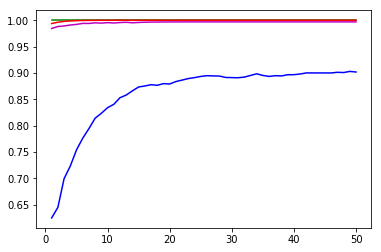

In [42]:
x = [i+1 for i in range(50)]
for i in range(len(data_acc)):
    dat = data_acc[i]
    dat = smooth(dat, 0.6)
    if i < 1: plt.plot(x, dat, 'b')
    elif i < 2: plt.plot(x, dat, 'm')
    elif i < 3: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

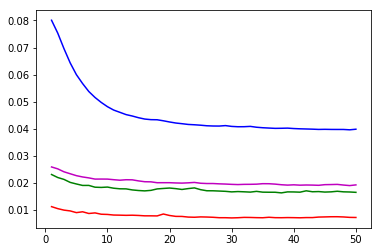

In [43]:
x = [i+1 for i in range(50)]
for i in range(len(data_r1)):
    dat = data_r1[i]
    dat = smooth(dat, 0.6)
    if i < 1: plt.plot(x, dat, 'b')
    elif i < 2: plt.plot(x, dat, 'm')
    elif i < 3: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

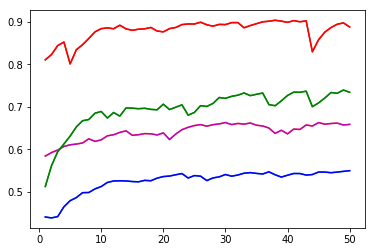

In [44]:
x = [i+1 for i in range(50)]
for i in range(len(data_iou)):
    dat = data_iou[i]
    dat = smooth(dat, 0.6)
    plt.plot(x, dat)
    if i < 1: plt.plot(x, dat, 'b')
    elif i < 2: plt.plot(x, dat, 'm')
    elif i < 3: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

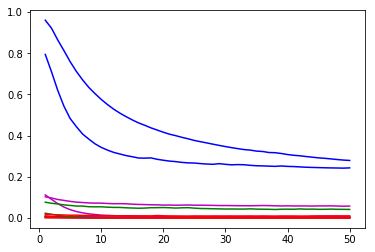

In [45]:
x = [i+1 for i in range(50)]
for i in range(len(data_loss)):
    dat = data_loss[i]
    dat = smooth(dat, 0.6)
    if i < 3: plt.plot(x, dat, 'b')
    elif i < 6: plt.plot(x, dat, 'm')
    elif i < 9: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

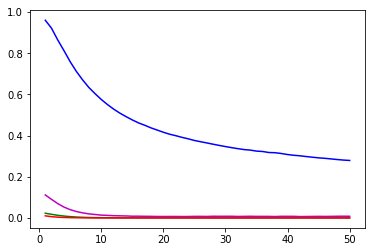

In [46]:
x = [i+1 for i in range(50)]
for i in range(0, len(data_loss), 3):
    dat = data_loss[i]
    dat = smooth(dat, 0.6)
    if i < 3: plt.plot(x, dat, 'b')
    elif i < 6: plt.plot(x, dat, 'm')
    elif i < 9: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

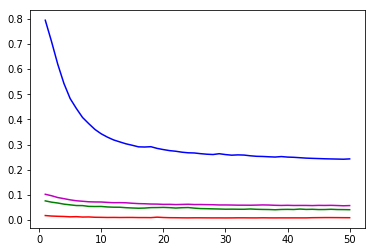

In [47]:
x = [i+1 for i in range(50)]
for i in range(1, len(data_loss), 3):
    dat = data_loss[i]
    dat = smooth(dat, 0.6)
    if i < 3: plt.plot(x, dat, 'b')
    elif i < 6: plt.plot(x, dat, 'm')
    elif i < 9: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

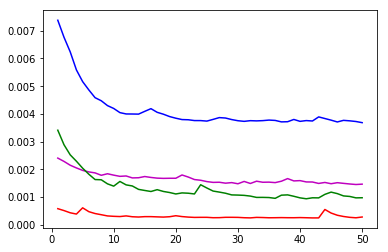

In [32]:
x = [i+1 for i in range(50)]
for i in range(2, len(data_loss), 3):
    dat = data_loss[i]
    dat = smooth(dat, 0.6)
    if i < 3: plt.plot(x, dat, 'b')
    elif i < 6: plt.plot(x, dat, 'm')
    elif i < 9: plt.plot(x, dat, 'g')
    else: plt.plot(x, dat, 'r')
plt.show()

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import tf_record
from tensorflow.core.util import event_pb2

def get_data(path):
    res = []
    try:
        for e in tf_record.tf_record_iterator(path):
            event = event_pb2.Event.FromString(e)
            for v in event.summary.value:
                if  'cumulative_reward' in v.tag:
                    res.append(v.simple_value)
    except:
        pass
    return res

def smooth(data, w):
    res = []
    pivot = data[0]
    for dat in data:
        res.append(pivot * w + dat * (1-w))
        pivot = pivot * w + dat * (1-w)
    return res

paths = ['./../../MTL/log_baseline/Navigation/events.out.tfevents.1595643553.ubuntu1']

data = []

for path in paths:
    dat = get_data(path)[:3125]
    print(len(dat))
    data.append(dat)

3125


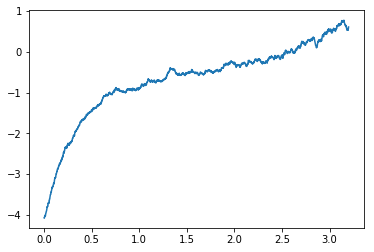

In [38]:
x = [256 * 4 * i / 1000000 for i in range(3125)]
for i in range(1):
    dat = data[i]
    dat = smooth(dat, 0.99)
    plt.plot(x, dat)
    #ax.plot(x, dat)
plt.show()

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import tf_record
from tensorflow.core.util import event_pb2

def get_data(path):
    res = []
    try:
        for e in tf_record.tf_record_iterator(path):
            event = event_pb2.Event.FromString(e)
            for v in event.summary.value:
                if  'raw_reward' in v.tag:
                    res.append(v.simple_value)
    except:
        pass
    return res

def smooth(data, w):
    res = []
    pivot = data[0]
    for dat in data:
        res.append(pivot * w + dat * (1-w))
        pivot = pivot * w + dat * (1-w)
    return res

paths = ['./../../MTL/log_baseline/Navigation/events.out.tfevents.1595842554.ubuntu1']

data = []

for path in paths:
    dat = get_data(path)[:12500]
    data.append(dat)

In [29]:
x = [256 * 4 * i / 1000000 for i in range(3125)]
for i in range(1):
    dat = data[i]
    dat = smooth(dat, 0.99)
    plt.plot(x, dat)
    #ax.plot(x, dat)
plt.show()

IndexError: list index out of range

In [107]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import tf_record
from tensorflow.core.util import event_pb2

def get_data(path):
    res = []
    try:
        for e in tf_record.tf_record_iterator(path):
            event = event_pb2.Event.FromString(e)
            for v in event.summary.value:
                if  ('raw_reward' in v.tag) and ('cumulative' not in v.tag):
                    res.append(v.simple_value)
    except:
        pass
    return res

def smooth(data, w):
    res = []
    pivot = data[0]
    for dat in data:
        res.append(pivot * w + dat * (1-w))
        pivot = pivot * w + dat * (1-w)
    return res

paths = ['./../../MTL/log_baseline/PPO/Navigation/easy/events.out.tfevents.1596677673.ubuntu1',
         './../../MTL/log_baseline/PPO/Navigation/medium/events.out.tfevents.1596534078.ubuntu1',
         './../../MTL/log_baseline/PPO/Navigation/hard/events.out.tfevents.1596606130.ubuntu1',
         './../../MTL/log_baseline/PPO/Navigation/new/events.out.tfevents.1598763162.ubuntu1',
         './../../MTL/log_baseline/PPO/KickTheBall/easy/events.out.tfevents.1596599829.ubuntu1',
         './../../MTL/log_baseline/PPO/KickTheBall/medium/events.out.tfevents.1595643559.ubuntu1',
         './../../MTL/log_baseline/PPO/KickTheBall/hard/events.out.tfevents.1596774099.ubuntu1',
         './../../MTL/log_baseline/PPO/KickTheBall/new/events.out.tfevents.1598862487.ubuntu1',
         './../../MTL/log_baseline/PPO/MANavigation/hard/events.out.tfevents.1598579910.ubuntu1',
         './../../MTL/log_baseline/PPO/MANavigation/new/events.out.tfevents.1598872394.ubuntu1',
         './../../MTL/log_baseline/PPO/GrabObject/full/events.out.tfevents.1596679814.ubuntu1',
         './../../MTL/log_baseline/PPO/GrabObject/notactile/events.out.tfevents.1596855573.ubuntu1'
        ]

dataPPO = []

for path in paths:
    dat = get_data(path)
    print(len(dat))
    dataPPO.append(dat)

5109
3129
3281
3214
3562
3547
3304
3300
5873
4903
7405
6269


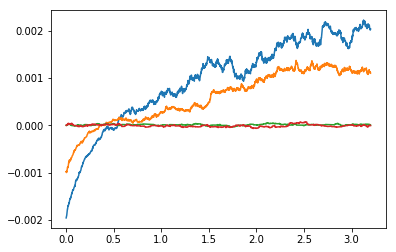

In [96]:
x = [256 * 4 * i / 1000000 for i in range(3125)]
for i in range(4):
    dat = dataPPO[i][:3125]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

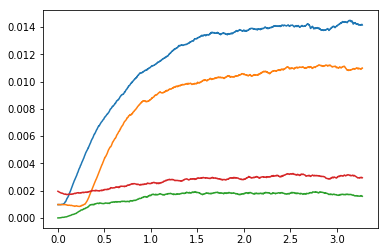

In [97]:
x = [256 * 4 * i * 1.6 / 1000000 for i in range(2000)]
for i in range(4,8):
    dat = dataPPO[i][:2000]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

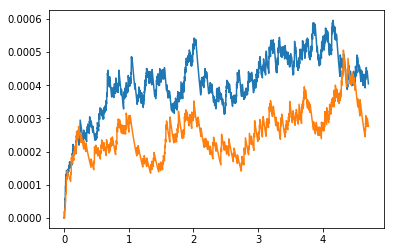

In [108]:
x = [256 * 4 * i / 1000000 for i in range(4600)]
for i in range(8, 10):
    dat = dataPPO[i][:4600]
    dat = smooth(dat, 0.995)
    dat = 4 * np.array(dat)
    plt.plot(x, dat)
plt.show()

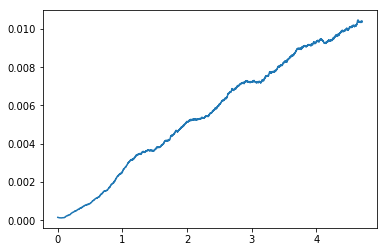

In [111]:
x = [256 * 4 * i / 1000000 for i in range(4600)]
for i in range(10, 11):
    dat = dataPPO[i][:4600]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

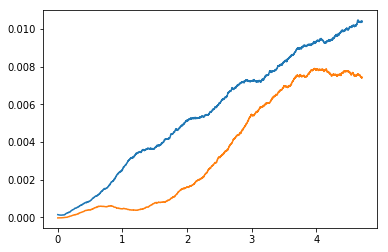

In [110]:
x = [256 * 4 * i / 1000000 for i in range(4600)]
for i in range(10, 12):
    dat = dataPPO[i][:4600]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

In [ ]:
#### import numpy as np
dat = [[0.002, 0.015, 0, 0], [0.001, 0.012, 0, 0.011], [0, 0.002, 0, 0]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, dat[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, dat[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, dat[2], color = 'r', width = 0.25)
plt.show()

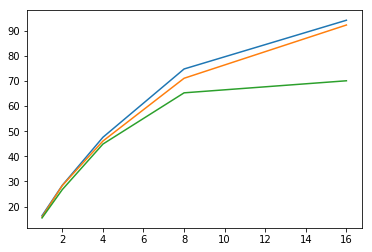

In [73]:
dat0 = [[16.4, 28.5, 47.6, 74.8, 94.2], [15.9, 28.4, 46.1, 71.1, 92.3], [15.5, 26.8, 44.9, 65.3, 70.1]]
x = [1, 2, 4, 8, 16]        
for dat in dat0:
        plt.plot(x, dat)
plt.show()

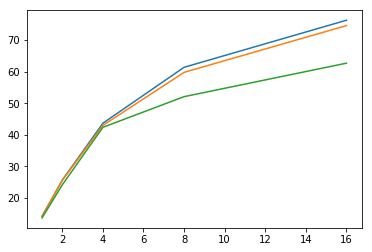

In [74]:
dat1 = [[14.2, 25.7, 43.7, 61.4, 76.3], [14.2, 25.6, 43.0, 59.8, 74.6], [13.7, 24.2, 42.4, 52.1, 62.7]]
x = [1, 2, 4, 8, 16]        
for dat in dat1:
        plt.plot(x, dat)
plt.show()

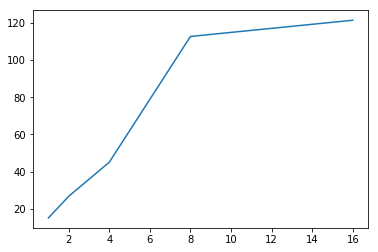

In [75]:
dat2 = [[15.2, 26.8, 45.1, 112.6, 121.3]]
x = [1, 2, 4, 8, 16]
for dat in dat2:
        plt.plot(x, dat)
plt.show()

In [112]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.lib.io import tf_record
from tensorflow.core.util import event_pb2

def get_data(path):
    res = []
    try:
        for e in tf_record.tf_record_iterator(path):
            event = event_pb2.Event.FromString(e)
            for v in event.summary.value:
                if  ('raw_reward' in v.tag) and ('cumulative' not in v.tag):
                    res.append(v.simple_value)
    except:
        pass
    return res

def smooth(data, w):
    res = []
    pivot = data[0]
    for dat in data:
        res.append(pivot * w + dat * (1-w))
        pivot = pivot * w + dat * (1-w)
    return res

paths = ['./../../MTL/log_baseline/SAC/Navigation/easy/events.out.tfevents.1597716509.ubuntu1',
         './../../MTL/log_baseline/SAC/Navigation/medium/events.out.tfevents.1597799835.ubuntu1',
         './../../MTL/log_baseline/SAC/Navigation/hard/events.out.tfevents.1597799682.ubuntu1',
         './../../MTL/log_baseline/SAC/Navigation/new/events.out.tfevents.1598666666.ubuntu1',
         './../../MTL/log_baseline/SAC/KickTheBall/easy/events.out.tfevents.1597890244.ubuntu1',
         './../../MTL/log_baseline/SAC/KickTheBall/medium/events.out.tfevents.1597897448.ubuntu1',
         './../../MTL/log_baseline/SAC/KickTheBall/hard/events.out.tfevents.1598510844.ubuntu1',
         './../../MTL/log_baseline/SAC/KickTheBall/new/events.out.tfevents.1598323457.ubuntu1',         
         './../../MTL/log_baseline/SAC/MANavigation/hard/events.out.tfevents.1598253487.ubuntu1',
         './../../MTL/log_baseline/SAC/MANavigation/new/events.out.tfevents.1599031069.ubuntu1',
         './../../MTL/log_baseline/SAC/GrabObject/events.out.tfevents.1598667251.ubuntu1',
         './../../MTL/log_baseline/SAC/GrabObject/events.out.tfevents.1598763505.ubuntu1'
        ]

dataSAC = []

for path in paths:
    dat = get_data(path)
    print(len(dat))
    dataSAC.append(dat)

3293
3205
3122
3150
3558
3294
3133
3236
5365
4767
2726
2081


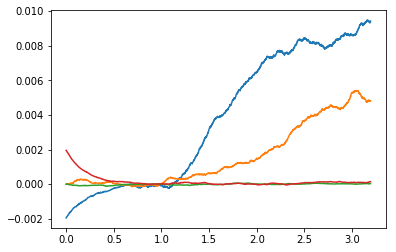

In [103]:
import numpy as np
x = [256 * 4 * i / 1000000 for i in range(3120)]
for i in range(4):
    dat = dataSAC[i][:3120]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

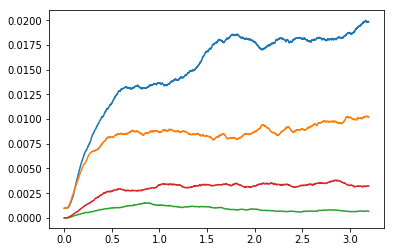

In [104]:
x = [256 * 4 * i  / 1000000 for i in range(3125)]
for i in range(4,8):
    dat = dataSAC[i][:3125]
    dat = smooth(dat, 0.995)
    plt.plot(x, dat)
plt.show()

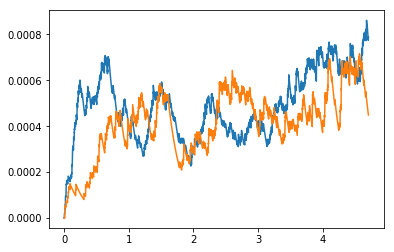

In [113]:
x = [256 * 4 * i / 1000000 for i in range(4600)]
for i in range(8, 10):
    dat = dataSAC[i][:4600]
    dat = smooth(dat, 0.995)
    dat = 4 * np.array(dat)
    plt.plot(x, dat)
plt.show()

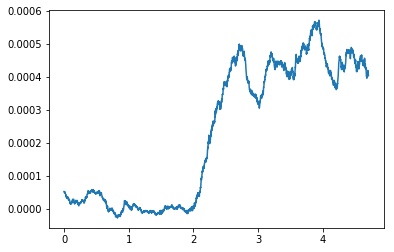

In [114]:
x = [256 * 4 * i / 1000000 for i in range(4600)]
dataGrab = dataSAC[10] + dataSAC[11]
dat = dataGrab[:4600]
dat = smooth(dat, 0.995)
plt.plot(x, dat)
plt.show()